In [1]:
import pandas as pd

In [2]:
# Read the CSV file
df = pd.read_csv('d:\Guvi\election prediction project\All_States_GA.csv')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16860\2837327124.py:1: DtypeWarning: Columns (34,35,36,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('d:\Guvi\election prediction project\All_States_GA.csv')


In [3]:
# Fill missing values
df['Sex'].fillna('Others', inplace=True)
df['Sex'] = df['Sex'].replace('NOTA', 'Others')
# Convert all state names to lowercase
df['PC_Name'] = df['PC_Name'].str.lower()


In [4]:

# Calculate total votes per constituency per year
df['Total_Votes'] = df.groupby(['Year', 'PC_Name', 'Party'])['Votes'].transform('sum')

# Determine winners
df['Result'] = df.groupby(['Year', 'PC_Name'])['Total_Votes'].transform('max') == df['Total_Votes']

#have only first 3 positions
#df = df[df['Position'] <= 4]

# Drop duplicate columns and keep necessary ones
df = df[['State_Name', 'PC_Name', 'Year', 'Party', 'Sex', 'Total_Votes', 'Result']]
df.drop_duplicates(inplace=True)

# Display the DataFrame
print(df)

            State_Name        PC_Name  Year    Party     Sex  Total_Votes  \
0       Andhra_Pradesh     srikakulam  1999      TDP       M       373579   
7       Andhra_Pradesh     srikakulam  1999      INC       M       276797   
14      Andhra_Pradesh     srikakulam  1999     AJBP       M         7277   
21      Andhra_Pradesh  parvathipuram  1999      TDP       M       303771   
28      Andhra_Pradesh  parvathipuram  1999      INC       M       290317   
...                ...            ...   ...      ...     ...          ...   
259043     West_Bengal        birbhum  2019     NOTA  Others        12307   
259050     West_Bengal        birbhum  2019     BNJD       M         9400   
259057     West_Bengal        birbhum  2019      BSP       M         9459   
259064     West_Bengal        birbhum  2019      IND       M         5526   
259071     West_Bengal        birbhum  2019  SUCI(C)       F         5995   

        Result  
0         True  
7        False  
14       False  
21     

In [5]:
# Save the updated dataframe to a new CSV file
df.to_csv('election_results.csv', index=False)


In [62]:
#df = pd.read_csv('election_results.csv')
winners = df[df['Result']==True]
# Gender representation
gender_counts = df['Sex'].value_counts()
winners_gender_counts = winners['Sex'].value_counts()

# Party performance over the years
party_wins = winners['Party'].value_counts()
party_wins_over_years = winners.groupby('Year')['Party'].value_counts().unstack().fillna(0)

# Display the results
print("Gender Representation:\n", gender_counts)
print("Winners by Gender:\n", winners_gender_counts)
print("Party Wins:\n", party_wins)
print("Party Wins Over the Years:\n", party_wins_over_years)

Gender Representation:
 Sex
M         11008
F          1142
Others      593
Name: count, dtype: int64
Winners by Gender:
 Sex
M         2407
F          298
Others       6
Name: count, dtype: int64
Party Wins:
 Party
BJP       1014
INC        563
CPM        102
SP          93
AITC        85
          ... 
JVM          1
HJCBL        1
BOPF         1
AUDF         1
SAD(M)       1
Name: count, Length: 73, dtype: int64
Party Wins Over the Years:
 Party  AAAP  ABLTC   AD  ADAL  ADMK  AGP  AIFB  AIMIM  AINRC  AITC  ...  SDF  \
Year                                                                ...        
1999    0.0    2.0  0.0   0.0  10.0  0.0   0.0    1.0    0.0   8.0  ...  1.0   
2004    0.0    0.0  0.0   0.0   0.0  2.0   3.0    1.0    0.0   2.0  ...  1.0   
2009    0.0    0.0  0.0   0.0   9.0  1.0   2.0    1.0    0.0  19.0  ...  1.0   
2014    4.0    0.0  2.0   0.0  37.0  0.0   0.0    1.0    1.0  34.0  ...  1.0   
2019    1.0    0.0  0.0   2.0   1.0  0.0   0.0    1.0    0.0  22.0  ...  

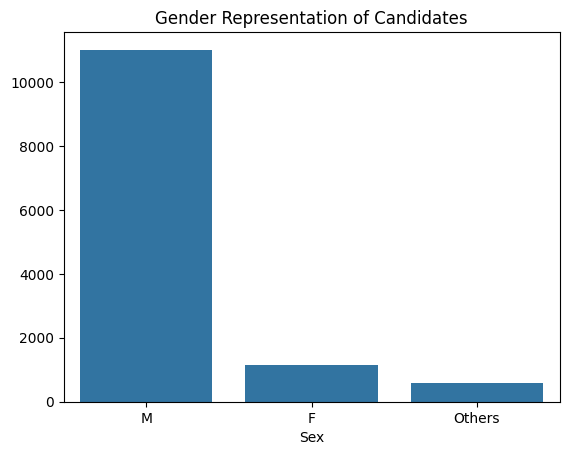

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
'''
# Voter turnout distribution
df['voter_turnout'] = (df['totvotpoll'] / df['electors']) * 100
sns.histplot(df['voter_turnout'], kde=True)
plt.title('Voter Turnout Distribution')
plt.show()'''

# Gender representation
gender_counts = df['Sex'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Gender Representation of Candidates')
plt.show()

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12743 entries, 0 to 259029
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   State_Name   12743 non-null  object
 1   PC_Name      12743 non-null  object
 2   Year         12743 non-null  int64 
 3   Party        12743 non-null  object
 4   Sex          12743 non-null  object
 5   Total_Votes  12743 non-null  int64 
 6   Result       12743 non-null  bool  
dtypes: bool(1), int64(2), object(4)
memory usage: 709.3+ KB


In [6]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
df['State_Name'] = label_encoder.fit_transform(df['State_Name'])
df['PC_Name'] = label_encoder.fit_transform(df['PC_Name'])
#df['PC_Type'] = label_encoder.fit_transform(df['PC_Type'])
#df['cand_name'] = label_encoder.fit_transform(df['cand_name'])
df['Party'] = label_encoder.fit_transform(df['Party'])
df['Sex'] = label_encoder.fit_transform(df['Sex'])


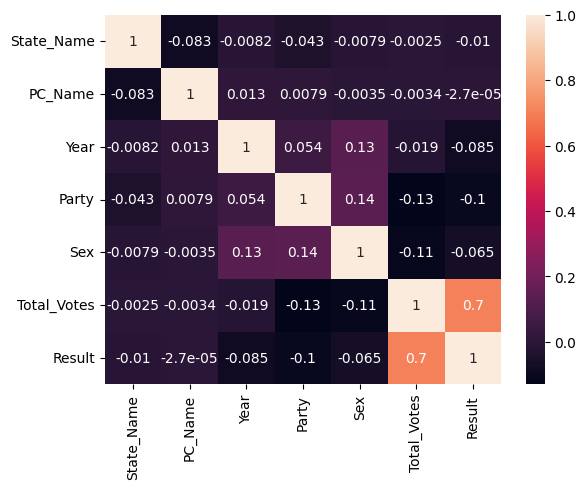

In [7]:
#Corelation Heat Map
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.corr(), annot=True)
plt.show()

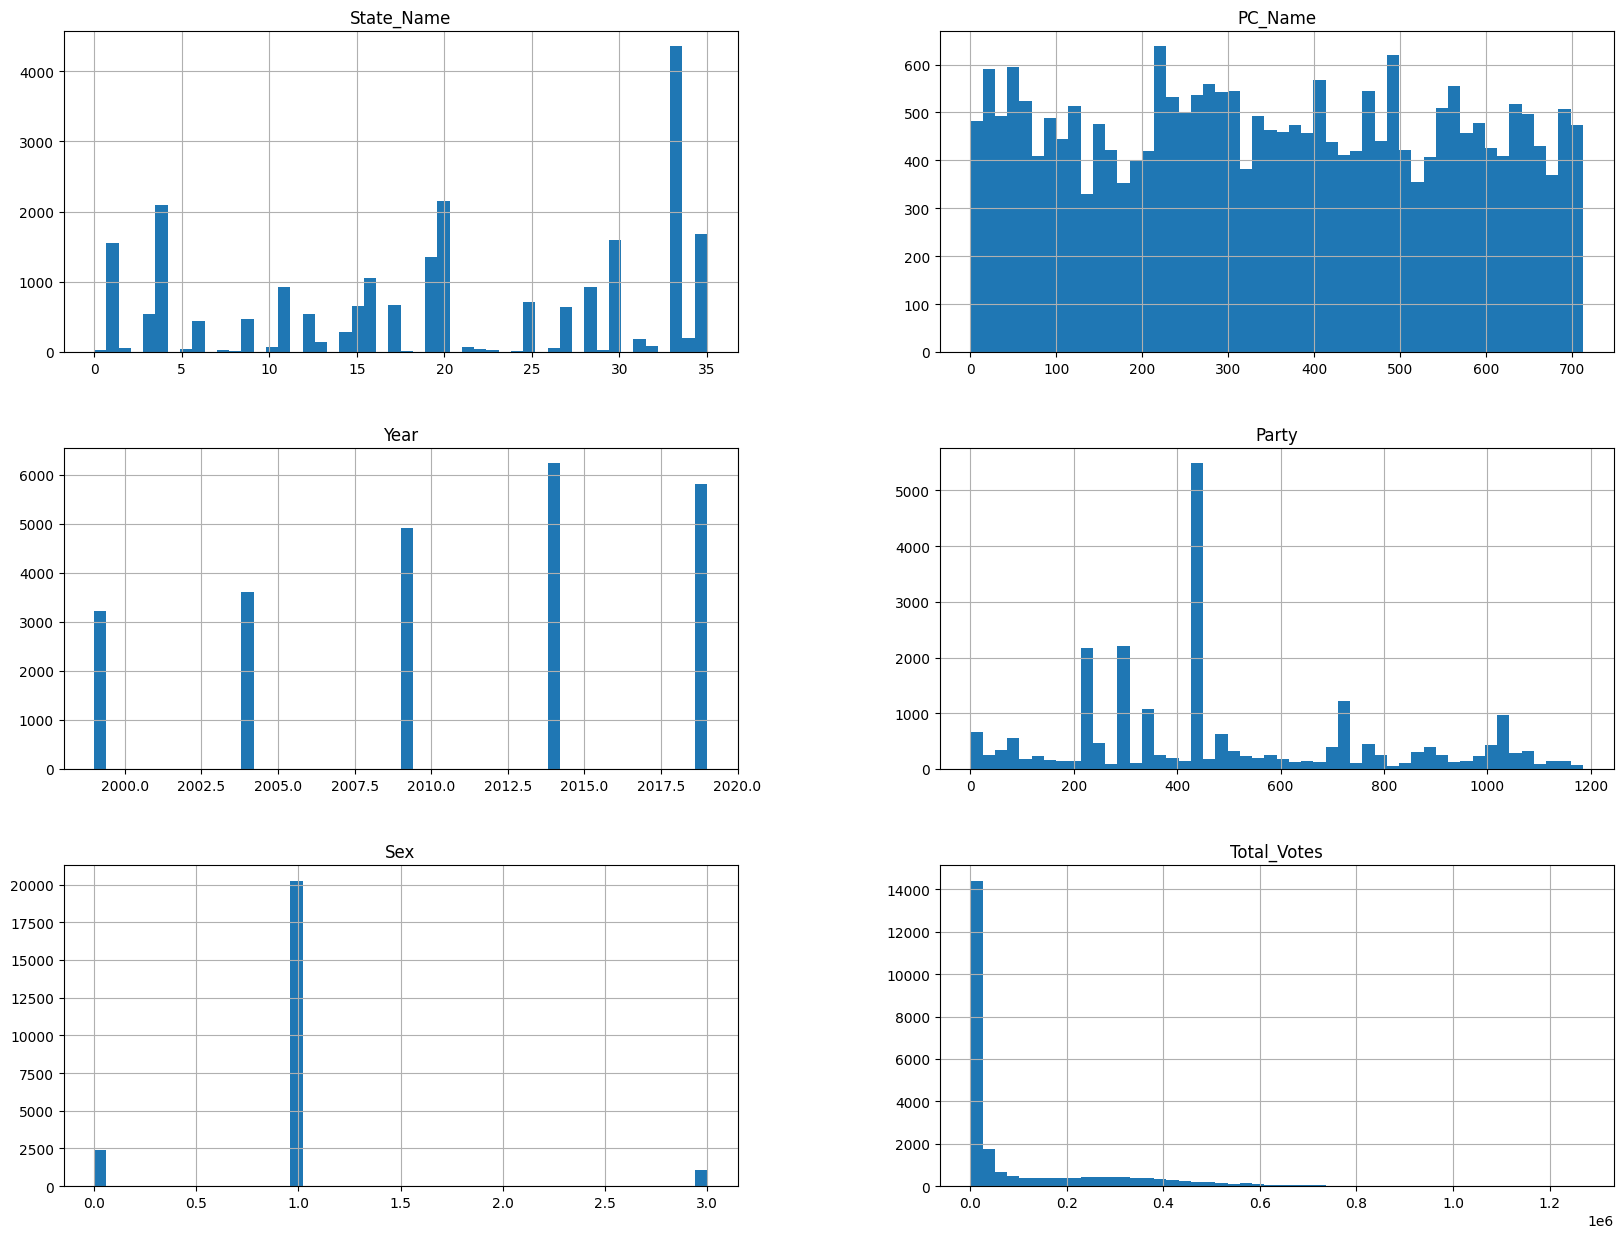

In [8]:
#Histogram for all the features (Checking for skewness)
df.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
features = df[['State_Name', 'Year', 'PC_Name', 'Party', 'Sex']]
df['Position'] = df['Result']

df['Position'] = label_encoder.fit_transform(df['Position'])
target = df['Position']

In [78]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define the model  
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(5,)))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model     
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model   
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
595/595 [==============================] - 3s 2ms/step - loss: 5.3491 - accuracy: 0.8042 - val_loss: 0.3882 - val_accuracy: 0.8852
Epoch 2/10
595/595 [==============================] - 2s 3ms/step - loss: 0.5047 - accuracy: 0.8672 - val_loss: 0.3739 - val_accuracy: 0.8852
Epoch 3/10
595/595 [==============================] - 2s 3ms/step - loss: 0.3960 - accuracy: 0.8809 - val_loss: 0.3985 - val_accuracy: 0.8852
Epoch 4/10
595/595 [==============================] - 2s 3ms/step - loss: 0.3730 - accuracy: 0.8837 - val_loss: 0.3543 - val_accuracy: 0.8852
Epoch 5/10
595/595 [==============================] - 2s 3ms/step - loss: 0.3638 - accuracy: 0.8841 - val_loss: 0.3426 - val_accuracy: 0.8852
Epoch 6/10
595/595 [==============================] - 2s 3ms/step - loss: 0.3569 - accuracy: 0.8847 - val_loss: 0.3308 - val_accuracy: 0.8852
Epoch 7/10
595/595 [==============================] - 2s 3ms/step - loss: 0.3560 - accuracy: 0.8851 - val_loss: 0.3314 - val_accuracy: 0.8852
Epoch 

In [79]:
#Save the model
model.save('election_prediction_model.h5')

d:\New folder (2)\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [104]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras_tuner import HyperModel, RandomSearch

class MyHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        model.add(Dense(units=hp.Choice('units', [32, 64, 128]), activation='relu', input_shape=(5,)))
        model.add(Dropout(rate=hp.Choice('dropout_rate', [0.2, 0.5])))
        model.add(Dense(units=hp.Choice('units', [32, 64, 128]), activation='relu'))
        model.add(Dropout(rate=hp.Choice('dropout_rate', [0.2, 0.5])))
        model.add(Dense(1, activation='sigmoid'))

        model.compile(optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
        return model

# Initialize the tuner
tuner = RandomSearch(
    MyHyperModel(),
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=3,
    directory='my_dir',
    project_name='helloworld')

# Use the search method to find the best hyperparameters
tuner.search(X_train, y_train, epochs=10, validation_split=0.2)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The optimal number of units in the layers is {best_hps.get('units')},
the optimal dropout rate is {best_hps.get('dropout_rate')},
and the optimal optimizer is {best_hps.get('optimizer')}.
""")
#Save the model
model.save('my_best_model.h5')

Reloading Tuner from my_dir\helloworld\tuner0.json

The optimal number of units in the layers is 64,
the optimal dropout rate is 0.2,
and the optimal optimizer is adam.



In [105]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

149/149 [==============================] - 0s 3ms/step - loss: 0.3570 - accuracy: 0.8852
Test loss: 0.3570222854614258
Test accuracy: 0.885173499584198


In [107]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Make predictions
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int)

# Evaluate predictions
#from sklearn.metrics import classification_report
#print(classification_report(y_test, predicted_classes))

149/149 [==============================] - 0s 3ms/step - loss: 0.3570 - accuracy: 0.8852
Model Accuracy: 88.52%
149/149 [==============================] - 1s 3ms/step


In [13]:
%%writefile ElectionPrediction.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from tensorflow.keras.models import load_model
import numpy as np
from sklearn.preprocessing import LabelEncoder
import joblib

# Load the dataset

def load_data():
    df = pd.read_csv('election_results.csv')
    df['Year'] = df['Year'].astype(int)
    label_encoder_st_name = LabelEncoder()
    label_encoder_pc_name = LabelEncoder()
    label_encoder_partyabbre = LabelEncoder()
    label_encoder_cand_sex = LabelEncoder()

    df['State_Name'] = label_encoder_st_name.fit_transform(df['State_Name'])
    df['PC_Name'] = label_encoder_pc_name.fit_transform(df['PC_Name'])
    #df['pc_type'] = label_encoder_pc_type.fit_transform(df['pc_type'])
    df['Sex'] = label_encoder_cand_sex.fit_transform(df['Sex'])
    df['Party'] = label_encoder_partyabbre.fit_transform(df['Party'])

    # Inverse transform for display
    df['st_name_display'] = label_encoder_st_name.inverse_transform(df['State_Name'])
    df['pc_name_display'] = label_encoder_pc_name.inverse_transform(df['PC_Name'])
    #df['pc_type_display'] = label_encoder_pc_type.inverse_transform(df['pc_type'])
    df['cand_sex_display'] = label_encoder_cand_sex.inverse_transform(df['Sex'])
    df['partyabbre_display'] = label_encoder_partyabbre.inverse_transform(df['Party'])

    return df, label_encoder_st_name, label_encoder_pc_name, label_encoder_cand_sex, label_encoder_partyabbre

df, label_encoder_st_name, label_encoder_pc_name, label_encoder_cand_sex, label_encoder_partyabbre = load_data()

# Load the model
def load_prediction_model():
    return load_model('election_prediction_model.h5')

model = load_prediction_model()

# EDA
st.title('Election Result Prediction & Data Analysis')

# Gender representation over the years
st.subheader('Gender Representation Over the Years')
gender_trend = df.groupby('Year')['cand_sex_display'].value_counts().unstack().fillna(0)
gender_trend.plot(kind='bar', stacked=True, figsize=(15, 7))
st.pyplot(plt)

# Prediction for 2024
st.subheader('Predict Election Results for 2024')

# Create a form for user input
with st.form('prediction_form'):
    year = 2024
    st_name = st.selectbox('State Name', df['st_name_display'].unique())

    # Filter AC names and numbers based on the selected state
    filtered_df = df[df['st_name_display'] == st_name]
    #pc_no = st.selectbox('Assembly Constituency Number', filtered_df['PC_No'].unique())
    #con_no = st.selectbox('Assembly Constituency Number', filtered_df['Constituency_No'].unique())
    pc_name = st.selectbox('Assembly Constituency Name', filtered_df['pc_name_display'].unique())
    #pc_type = st.selectbox('Assembly Constituency Type', filtered_df['pc_type_display'].unique())
    cand_sex = st.selectbox('Candidate Gender', df['cand_sex_display'].unique())
    partyabbre = st.selectbox('Party Abbreviation', filtered_df['partyabbre_display'].unique())
        
    submit_button = st.form_submit_button(label='Predict')

    if submit_button:
        # Encode the selected values for prediction
        st_name_encoded = label_encoder_st_name.transform([st_name])[0]
        pc_name_encoded = label_encoder_pc_name.transform([pc_name])[0]
        #pc_type_encoded = label_encoder_pc_type.transform([pc_type])[0]
        cand_sex_encoded = label_encoder_cand_sex.transform([cand_sex])[0]
        partyabbre_encoded = label_encoder_partyabbre.transform([partyabbre])[0]
        
        input_data = np.array([[ st_name_encoded, year, pc_name_encoded, partyabbre_encoded, cand_sex_encoded]])
        prediction = model.predict(input_data)
        probability_of_winning = prediction[0][0] * 100
        st.write(f'Prediction: Approximate Vote percentage of {partyabbre} in this constituency is: {probability_of_winning:.2f}%')
        st.write(f'Raw Prediction Value: {prediction[0][0]}')

        # Load the data
df = pd.read_csv('election_results.csv')
st.set_option('deprecation.showPyplotGlobalUse', False)
# Normalize the 'Party' column to ensure consistency
df['Party'] = df['Party'].str.upper()

# Filter the data for BJP and INC
df_bjp = df[df['Party'] == 'BJP']
df_inc = df[df['Party'] == 'INC']

# Combine the filtered data
df_combined = pd.concat([df_bjp, df_inc])

# Plot using Seaborn for better aesthetics
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_combined, x='Year', y='Total_Votes', hue='Party', style='Party', markers=True, dashes=False)
plt.xlabel('Year')
plt.ylabel('Total Votes')
plt.title('Total Votes by Year for BJP and INC')
plt.legend(title='Party')
plt.grid(True)

# Display plot using Streamlit
st.pyplot()

# Plot using Plotly for interactivity
fig = px.line(df_combined, x='Year', y='Total_Votes', color='Party', title='Total Votes by Year for BJP and INC',
              labels={'Total_Votes': 'Total Votes', 'Year': 'Year'})
st.plotly_chart(fig)


Overwriting ElectionPrediction.py
